# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [28]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [ ]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [73]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [56]:
start_date = '2019-06-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD'] #your tickers of interest.

### The main part starts here:

In [61]:
model = MODEL(tickers=tickers, periods=(50, 200, 100))
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  3 of 3 completed


In [62]:
start_date_range = pd.Timestamp(2019, 6, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 22 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,BTC-USD,LTC-USD,XRP-USD
Datetime,,,
2020-04-15 18:00:00+01:00,6724.846191,40.433876,0.184323
2020-04-16 18:00:00+01:00,7021.342285,42.444279,0.187972
2020-04-17 18:00:00+01:00,7082.226562,42.499939,0.189167
2020-04-18 18:00:00+01:00,7233.494141,43.709045,0.194548
2020-04-19 18:00:00+01:00,7197.814941,43.053310,0.192072


In [63]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                   ticker = ['BTC-USD', 'LTC-USD', 'XRP-USD']                   |
|                             start date = 06/03/19                              |
|                              end date = 04/19/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: 358.12 tax was paid.
----------------------------------------------

In [46]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 16:00:00,2020-01-12 16:00:00,8003.403498,8103.410450,202.499111,2.499111,0.012496
1,2020-01-13 16:00:00,2020-01-15 16:00:00,8118.115083,8742.038287,218.062316,15.563206,0.076856
2,2020-01-17 16:00:00,2020-01-18 16:00:00,8911.138670,8852.169966,216.619307,-1.443009,-0.006617
3,2020-01-26 16:00:00,2020-01-30 16:00:00,8513.971661,9299.279538,236.599741,19.980434,0.092238
4,2020-02-01 16:00:00,2020-02-02 16:00:00,9418.057609,9388.660431,235.861228,-0.738514,-0.003121
5,2020-02-04 16:00:00,2020-02-07 16:00:00,9234.738458,9739.421311,248.751156,12.889928,0.054650
6,2020-02-08 16:00:00,2020-02-09 16:00:00,9851.528814,10029.694143,253.249831,4.498676,0.018085
7,2020-02-11 16:00:00,2020-02-12 16:00:00,10151.364573,10283.477400,256.545699,3.295867,0.013014
8,2020-02-17 16:00:00,2020-02-19 16:00:00,9708.189527,10105.129716,267.035121,10.489422,0.040887
9,2020-02-22 16:00:00,2020-02-24 16:00:00,9645.214459,9653.502932,267.264594,0.229473,0.000859


[INFO]: New sell signal was detected for last value: 7197.81494140625.


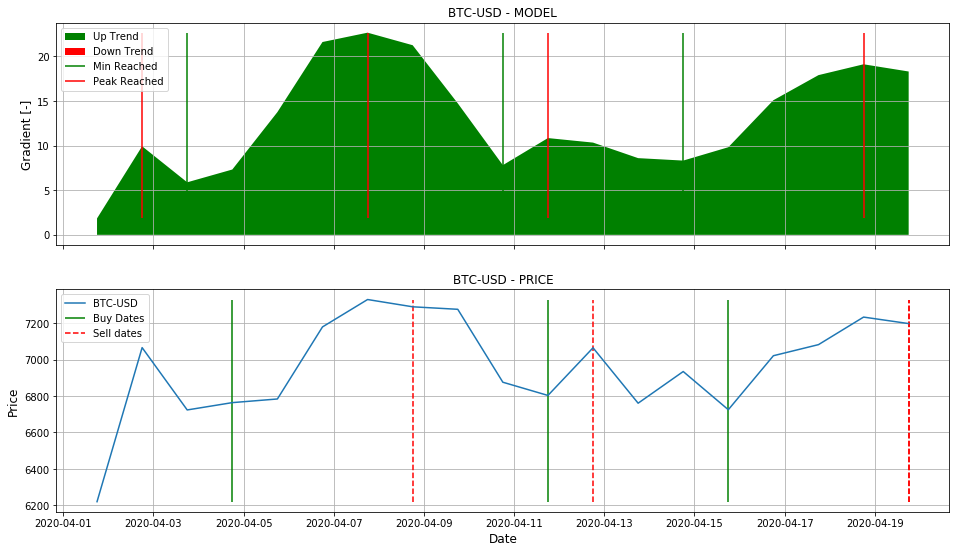

[INFO]: New sell signal was detected for last value: 43.05331039428711.


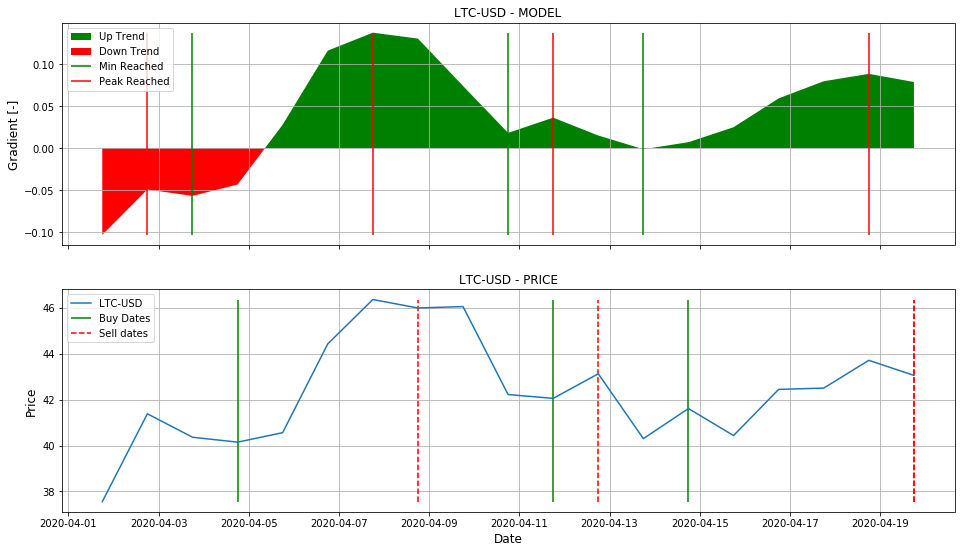

[INFO]: New sell signal was detected for last value: 0.19207152724266052.


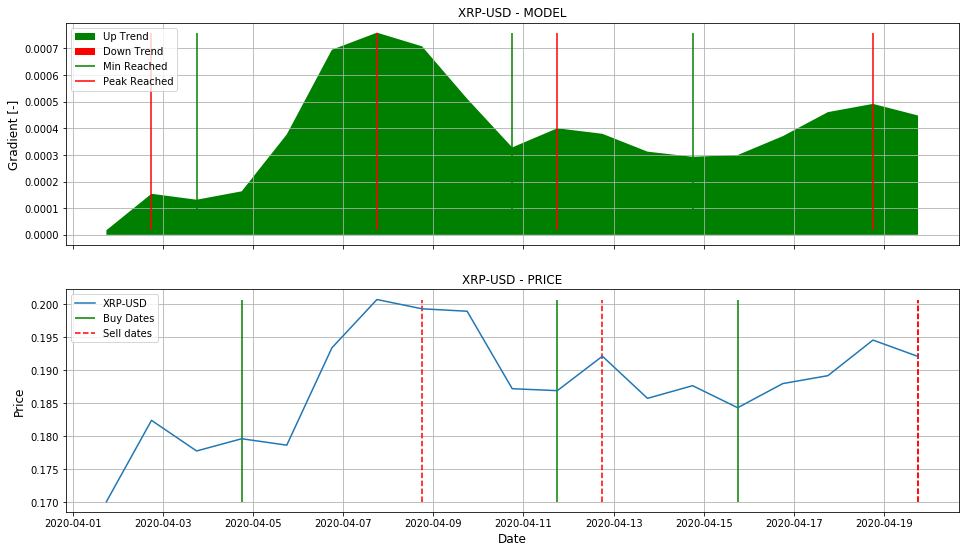

In [66]:
plotting.plot_model(model, tickers='all', plot_from_date='2020-04-01')

In [67]:
imag_model = model.copy_model()

In [68]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [69]:
imag_model.data.tail(5)

,BTC-USD,LTC-USD,XRP-USD
2020-04-16 18:00:00+01:00,7021.342285,42.444279,0.187972
2020-04-17 18:00:00+01:00,7082.226562,42.499939,0.189167
2020-04-18 18:00:00+01:00,7233.494141,43.709045,0.194548
2020-04-19 18:00:00+01:00,7197.814941,43.053310,0.192072
2020-04-20 18:00:00+01:00,NaN,NaN,NaN


In [70]:
imag_model.comp_break_values()

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Current ticker: LTC-USD
[INFO]: Current ticker: XRP-USD
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7197.81494140625, 'LTC-USD': 43.05331039428711, 'XRP-USD': 0.19207152724266052}
[INFO]: Break values: {'BTC-USD': [7216.529260253631, 7272.672216796593], 'LTC-USD': [43.03608907013087, 43.70772071228183], 'XRP-USD': [0.1924556702971607, 0.19549040042759552]}
[INFO]: Tolerances: {'BTC-USD': array([18.71431885, 74.85727539]), 'LTC-USD': array([-0.01722132,  0.65441032]), 'XRP-USD': array([0.00038414, 0.00341887])}


In [71]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD,LTC-USD,XRP-USD
2020-04-16 18:00:00+01:00,7021.342285,42.444279,0.187972
2020-04-17 18:00:00+01:00,7082.226562,42.499939,0.189167
2020-04-18 18:00:00+01:00,7233.494141,43.709045,0.194548
2020-04-19 18:00:00+01:00,7197.814941,43.053310,0.192072
2020-04-20 18:00:00+01:00,NaN,NaN,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 7126.322644500461
[INFO]: New sell signal was detected for last value: 7126.322644500461.


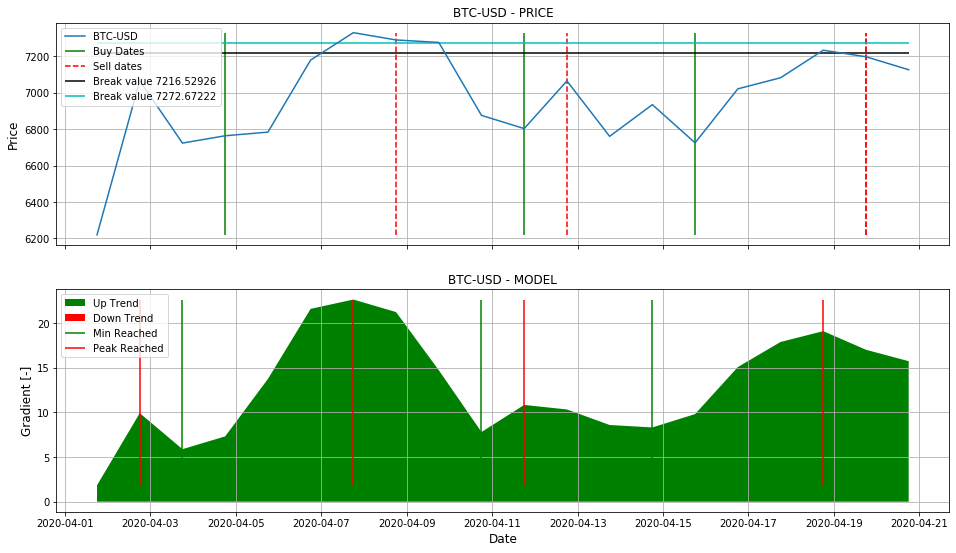

----------------------------------------------------------------------------------
[INFO]: Result for value: 7244.600738525112


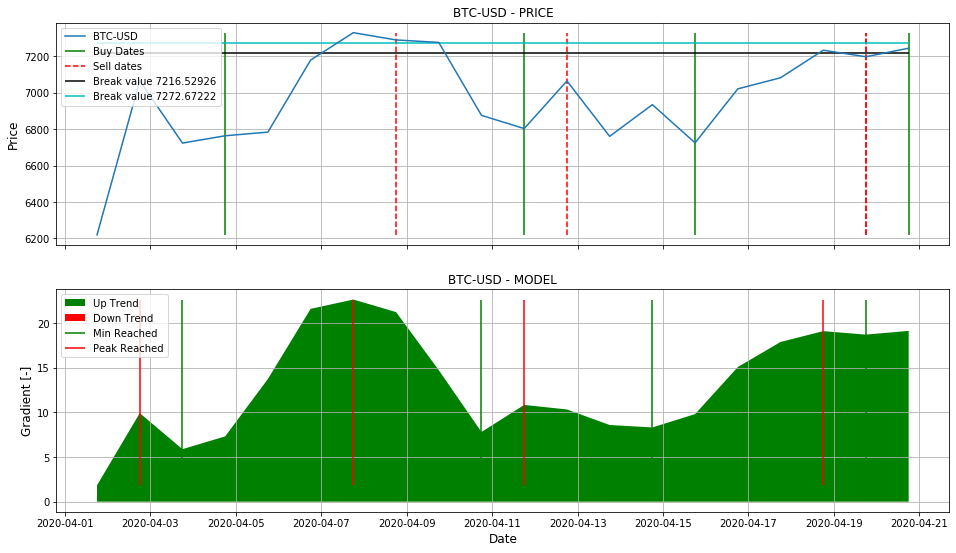

----------------------------------------------------------------------------------
[INFO]: Result for value: 7363.58061950655


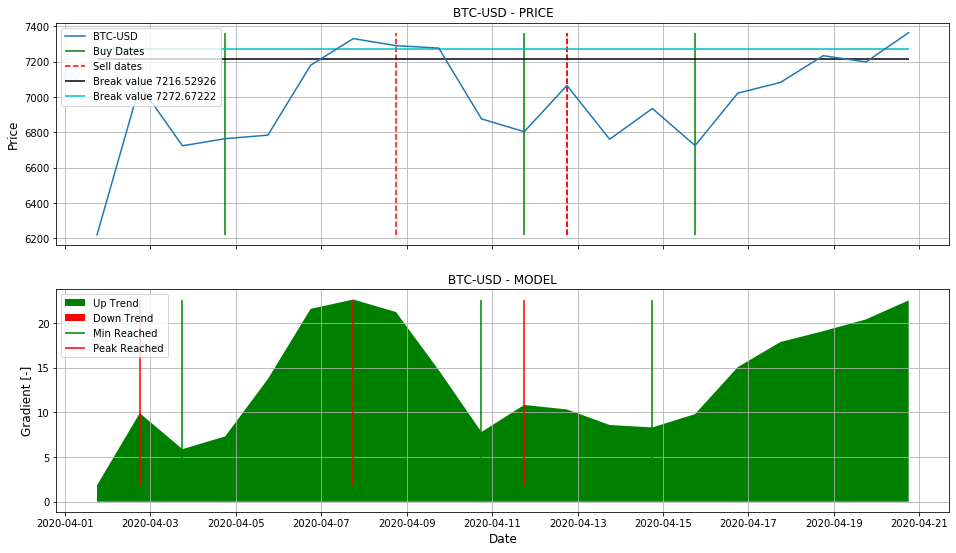

[INFO]: Current ticker: LTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 42.498137956754235
[INFO]: New sell signal was detected for last value: 42.498137956754235.


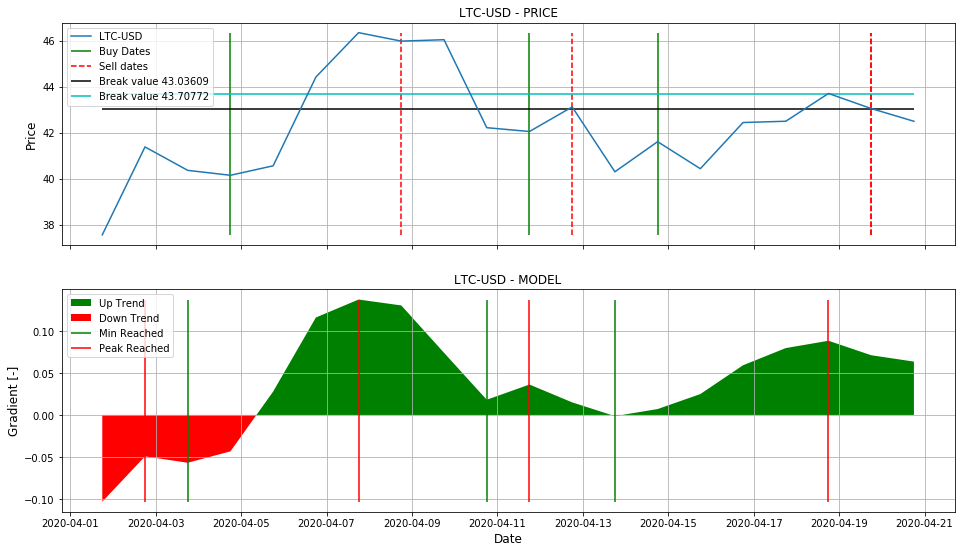

----------------------------------------------------------------------------------
[INFO]: Result for value: 43.37190489120635


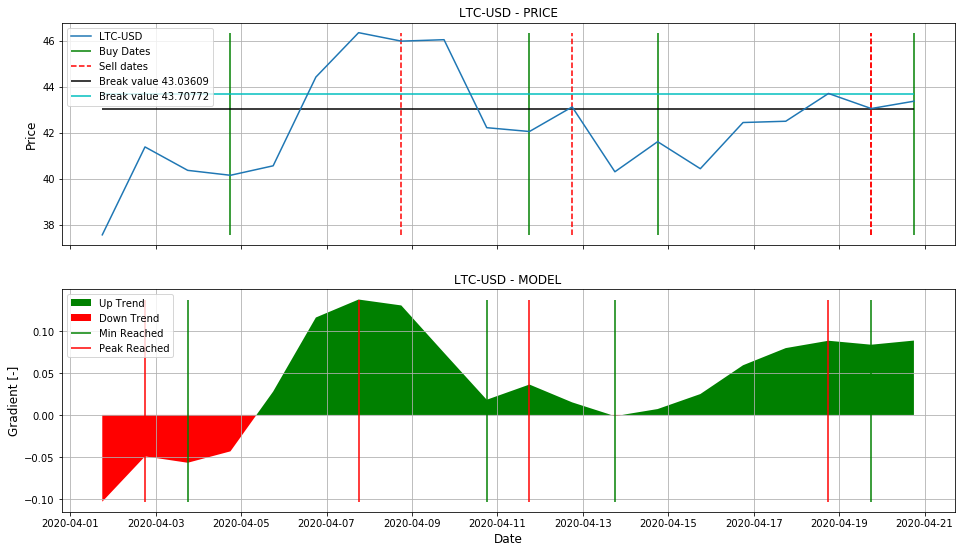

----------------------------------------------------------------------------------
[INFO]: Result for value: 44.254067221185345


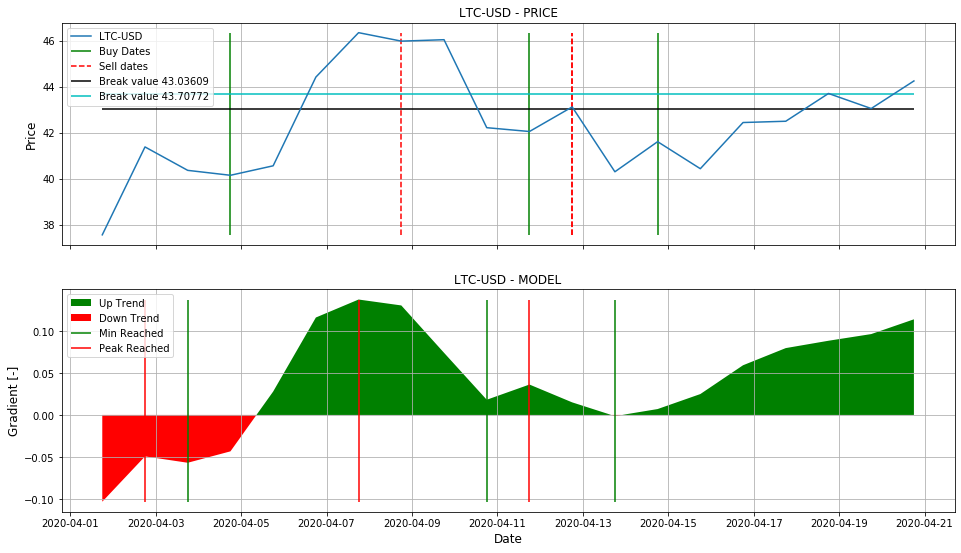

[INFO]: Current ticker: XRP-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 0.1900499744184462
[INFO]: New sell signal was detected for last value: 0.1900499744184462.


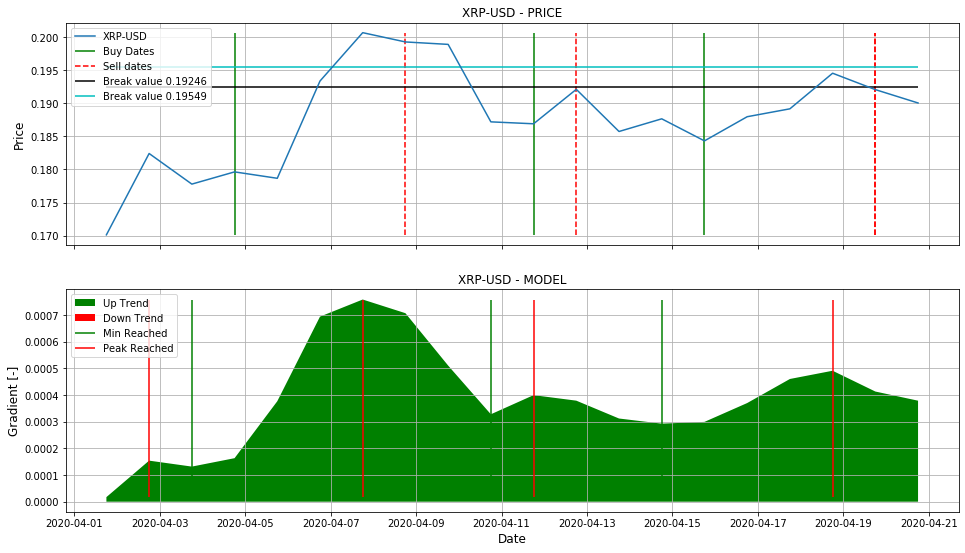

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.19397303536237812


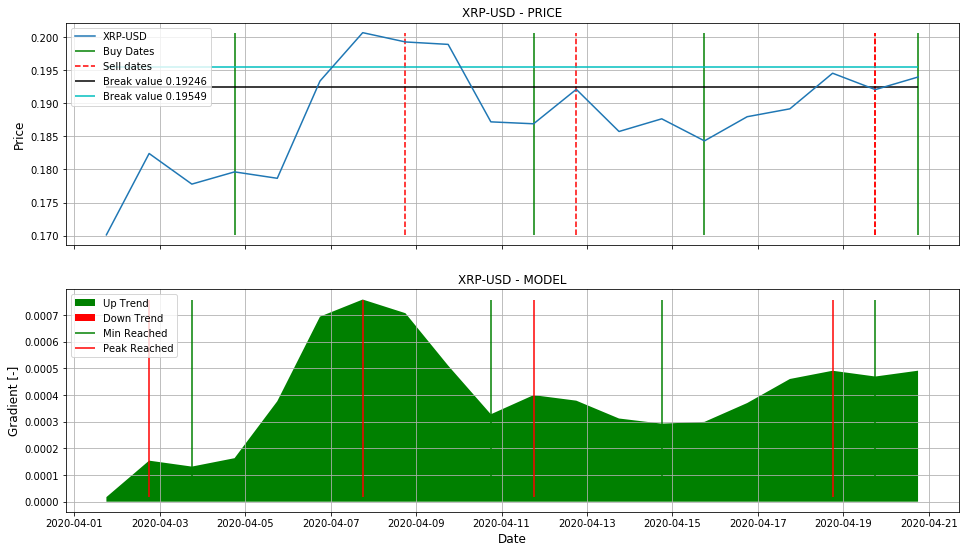

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.19793403043294047


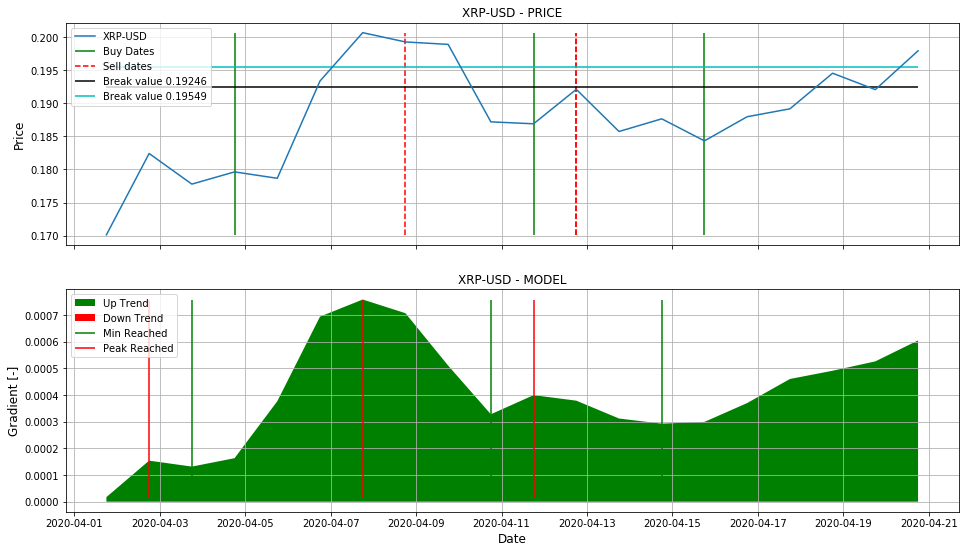

In [72]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=True)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-EVAL]: Probability for tol=-200.00000: 24.12%
[STATS-EVAL]: Probability for tol=74.85728: 40.46%
[STATS-EVAL]: Probability between: 16.34%


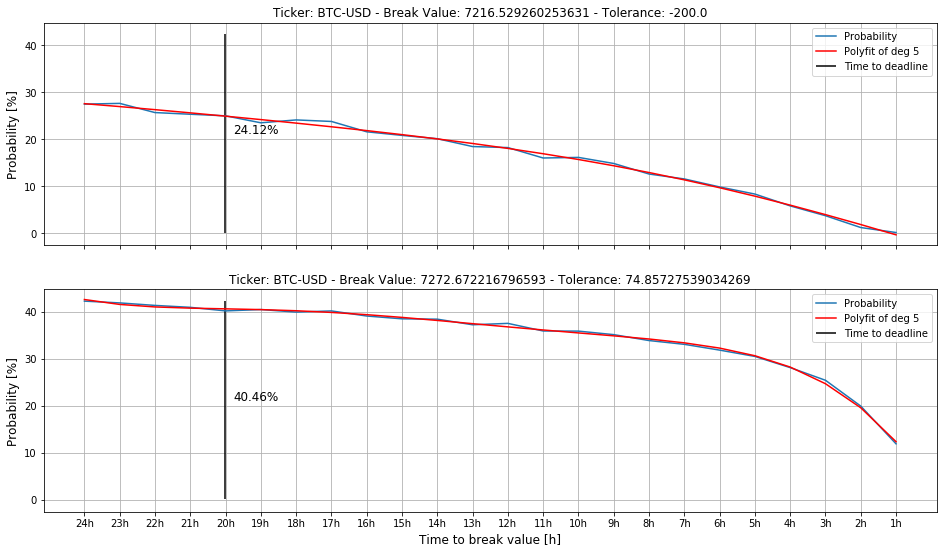

In [127]:
statistics.calc_probs(model=imag_model, tickers='BTC-USD', auto_update_tolerances=False)